# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_4DVARId.py'

In [2]:
import sys
sys.path.append('../..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_4DVARId
saveoutputs: True
name_exp_save: 2020a_4DVARId
path_save: outputs/2020a_4DVARId
tmp_DA_path: scratch/2020a_4DVARId
init_date: 2012-10-01 00:00:00
final_date: 2012-12-15 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 6:00:00
flag_plot: 1
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None

NAME_BC is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dlon: 0.1
dlat: 0.1
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_DIFF
name_var: {'SSH': 'ssh'}
var_to_save: None
name_init_var: {}
dtmodel: 3600
Kdiffus: 0
init_from_bc: False



In [6]:
from src import bc as bc
Bc = bc.Bc(config)

## Observations

In [7]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt

J1:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_jason1.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 92 tracks selected

EN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_envisat.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 79 tracks selected

TPN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_topex-poseidon_interleaved.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var

In [8]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

super: OBSOP_INTERP
path_save: None
compute_op: False
Npix: 4
mask_coast: False
dist_coast: 100
mask_borders: False



## Reduced Basis

In [9]:
from src import basis as basis
Basis = basis.Basis(config,State)

super: BASIS_BM
name_mod_var: ssh
wavelet_init: False
flux: True
save_wave_basis: inline
facns: 1.0
facnlt: 2.0
npsp: 3.5
facpsp: 1.5
lmin: 80
lmax: 970.0
lmeso: 300
tmeso: 10
sloptdec: -0.5
factdec: 1
tdecmin: 0.0
tdecmax: 15.0
facQ: 1
Qmax: 0.03
slopQ: -2
path_background: None
var_background: None



## Assimilation

super: INV_4DVAR
compute_test: False
path_init_4Dvar: None
restart_4Dvar: False
gtol: 1e-05
maxiter: 200
opt_method: L-BFGS-B
save_minimization: False
timestep_checkpoint: 6:00:00
sigma_R: 0.01
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False
anomaly_from_bc: False

--> 410 checkpoints to evaluate the cost function
lambda=9.7E+02 nlocs=4.0E+00 tdec=1.5E+01 Q=2.1E-02
lambda=6.8E+02 nlocs=4.0E+00 tdec=1.5E+01 Q=2.1E-02
lambda=4.8E+02 nlocs=8.0E+00 tdec=1.3E+01 Q=2.1E-02
lambda=3.3E+02 nlocs=9.0E+00 tdec=1.1E+01 Q=2.1E-02
lambda=2.3E+02 nlocs=1.5E+01 tdec=8.8E+00 Q=1.3E-02
lambda=1.6E+02 nlocs=2.3E+01 tdec=7.4E+00 Q=6.3E-03
lambda=1.1E+02 nlocs=4.2E+01 tdec=6.2E+00 Q=3.1E-03
lambda=8.0E+01 nlocs=7.0E+01 tdec=5.2E+00 Q=1.5E-03
reduced order: 3131604 --> 82152
 reduced factor: 38

*** Minimization ***



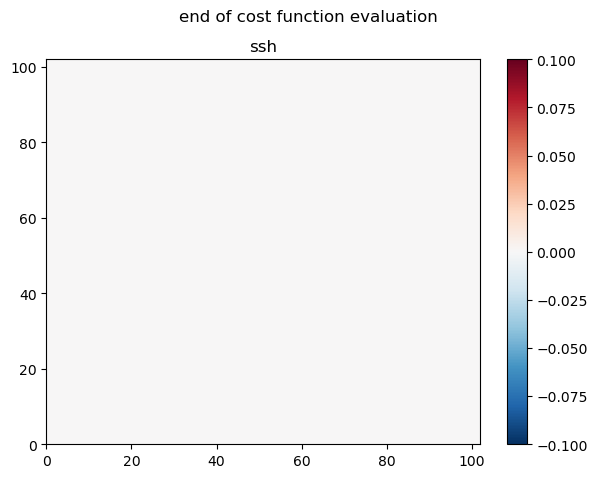

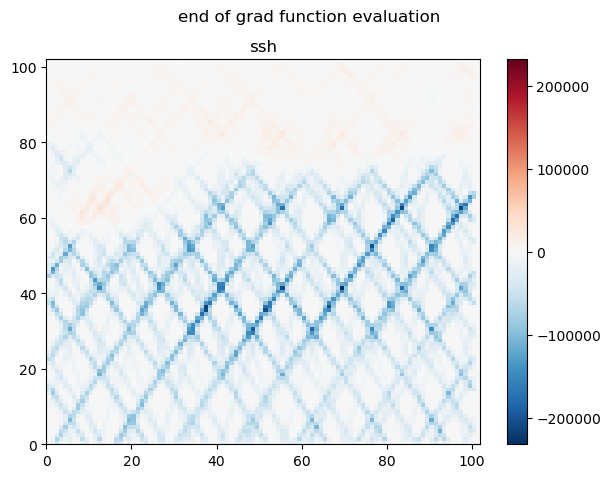

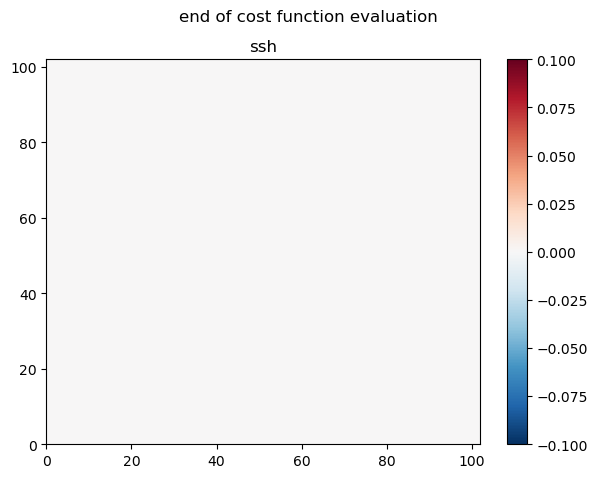

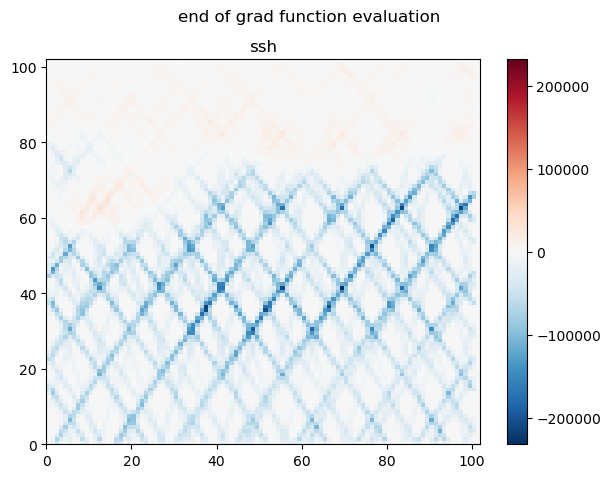

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        82152     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14464D+07    |proj g|=  1.20206D+06


 This problem is unconstrained.


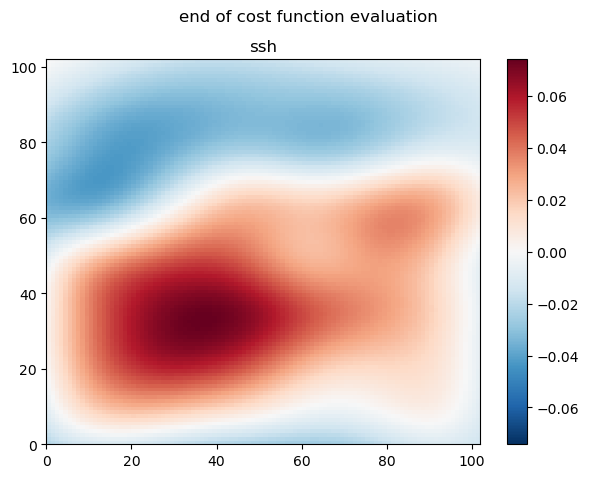

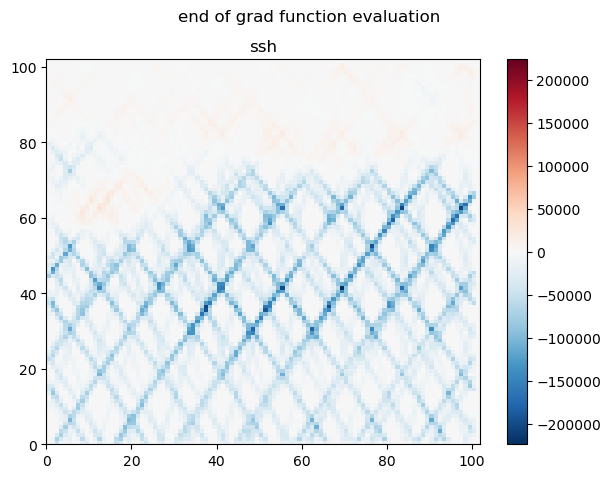

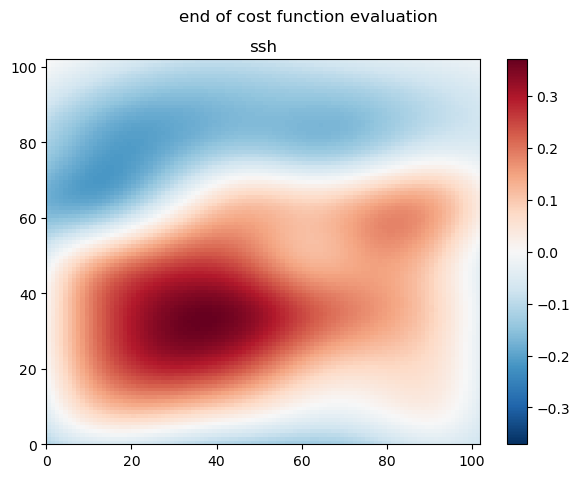

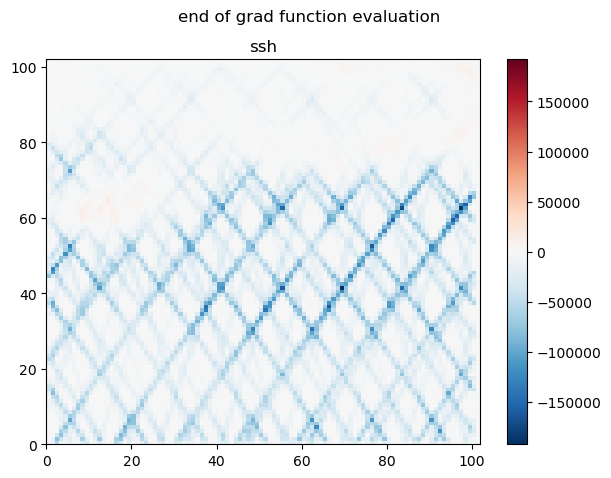


At iterate    1    f=  4.99971D+07    |proj g|=  6.00093D+05


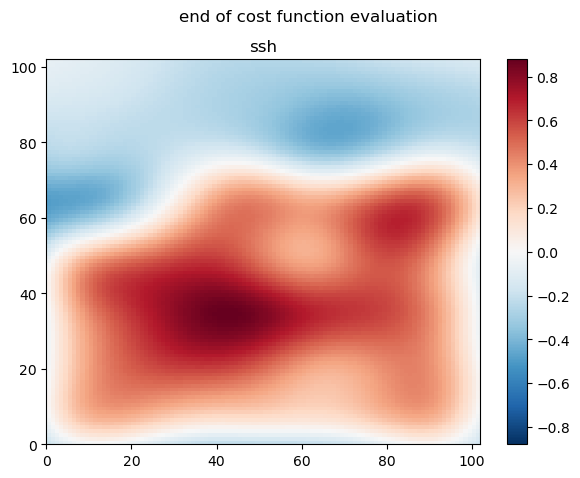

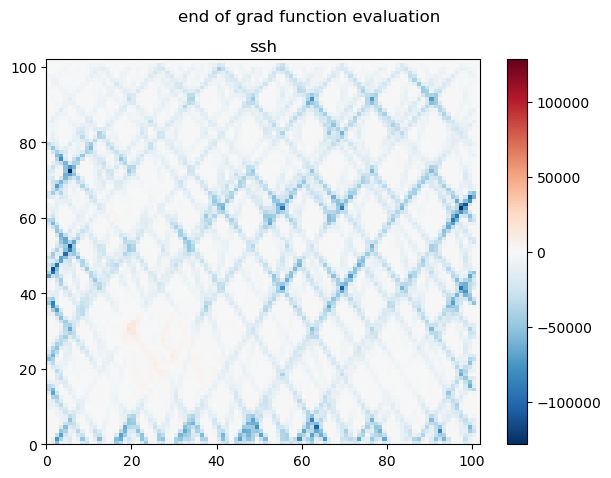


At iterate    2    f=  2.48406D+07    |proj g|=  2.78482D+05


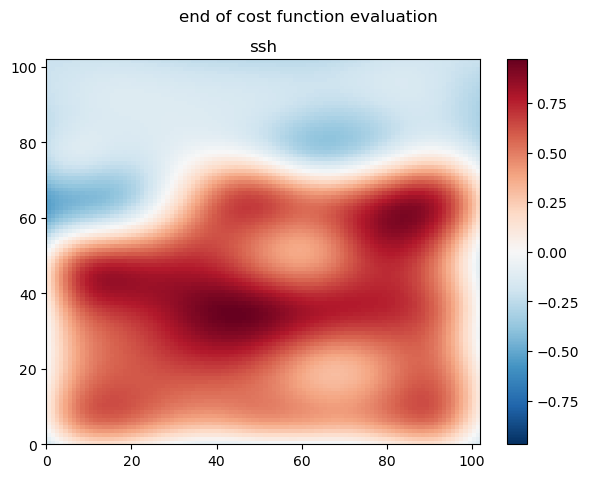

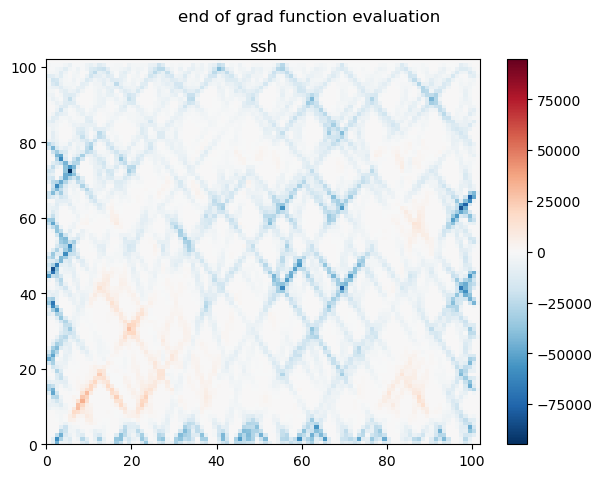


At iterate    3    f=  1.49061D+07    |proj g|=  1.83673D+05


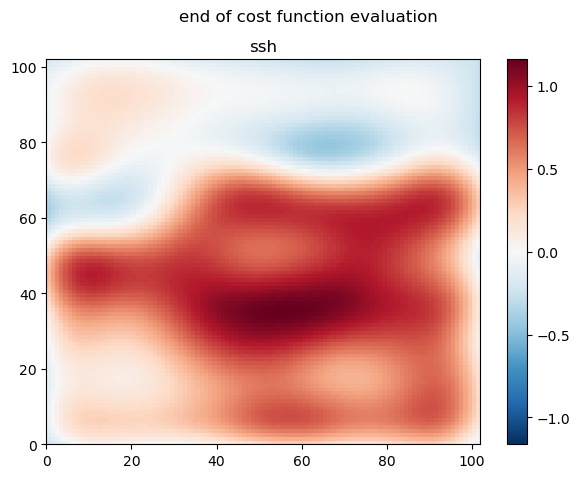

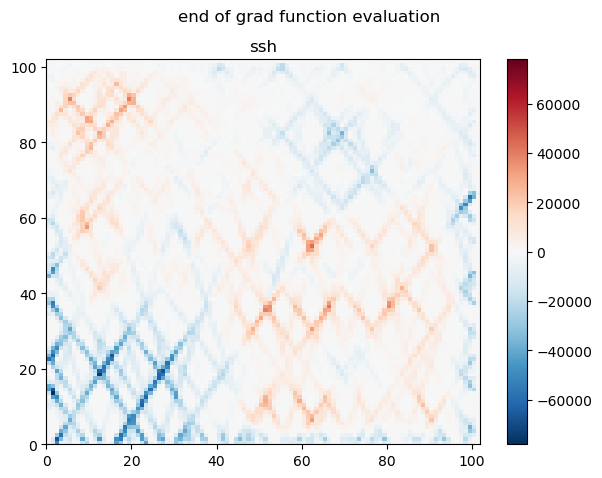


At iterate    4    f=  1.35562D+07    |proj g|=  5.89997D+05


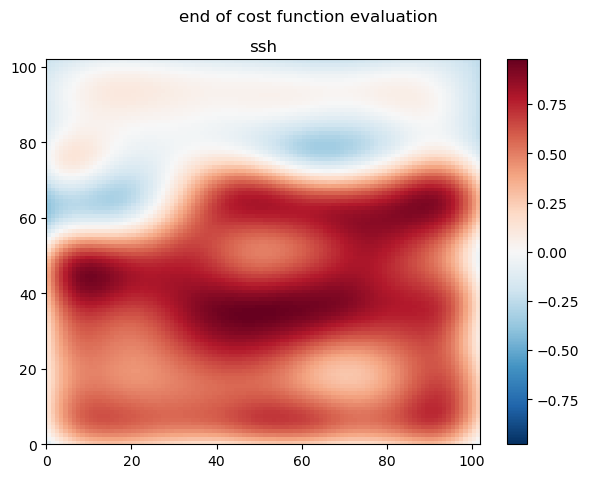

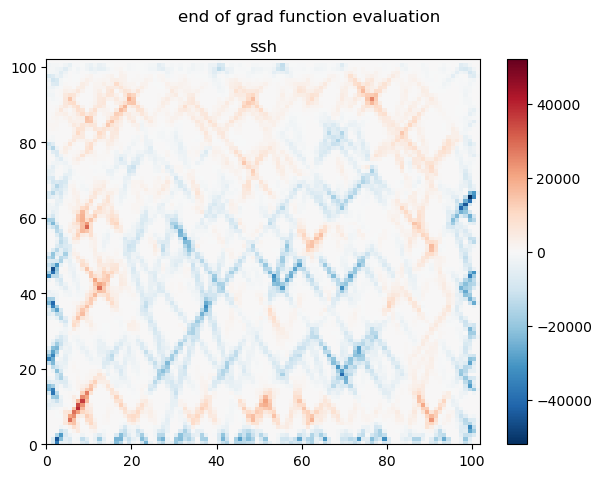


At iterate    5    f=  9.78239D+06    |proj g|=  8.40676D+04


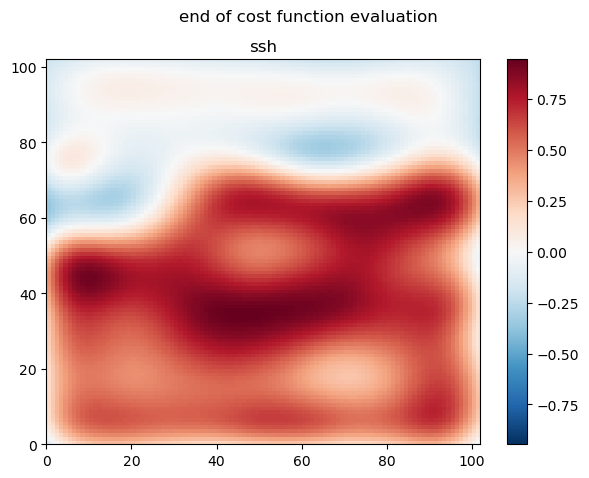

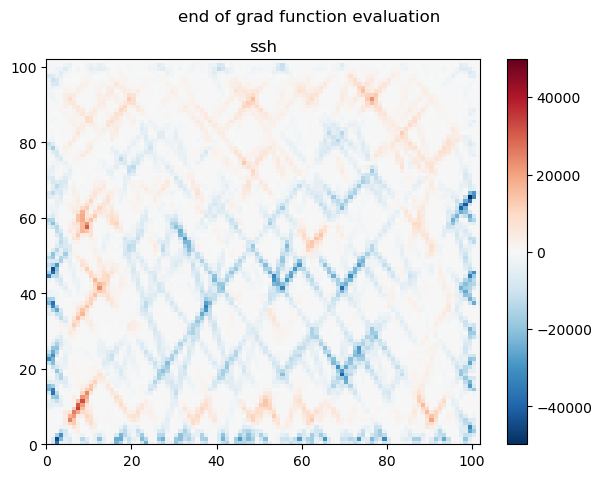


At iterate    6    f=  9.26905D+06    |proj g|=  6.38610D+04


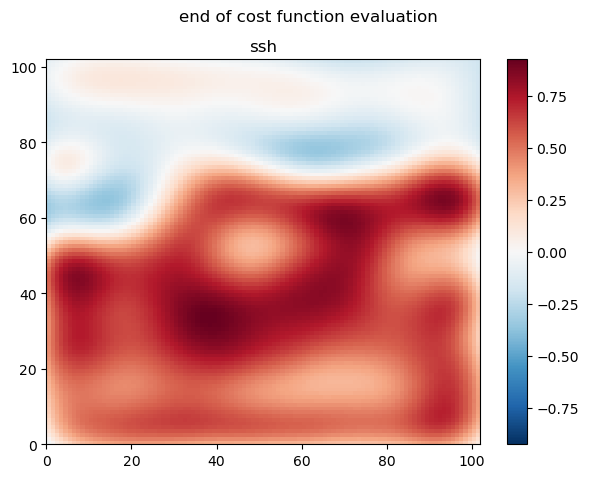

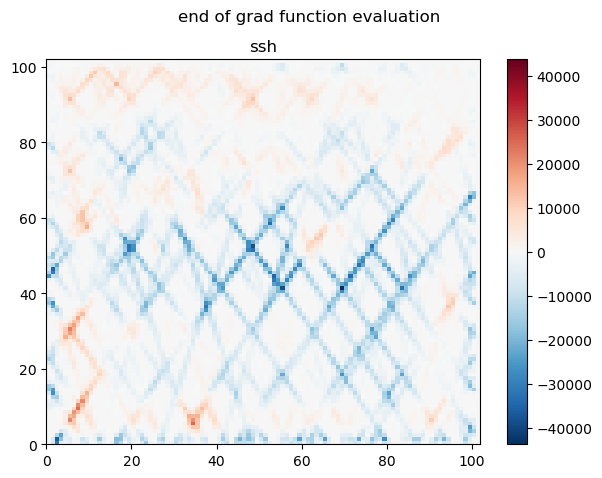


At iterate    7    f=  7.70130D+06    |proj g|=  9.22234D+04


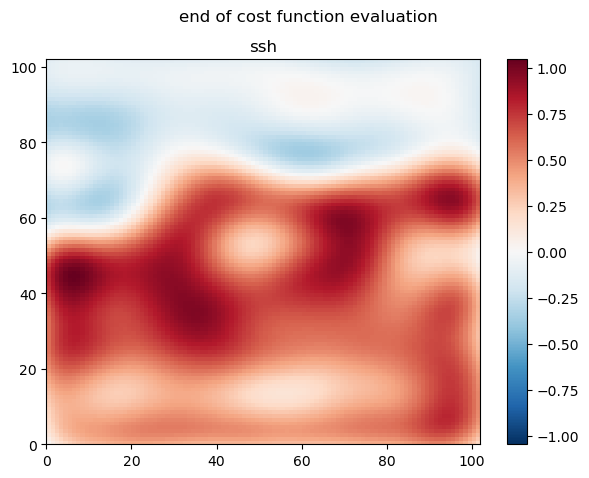

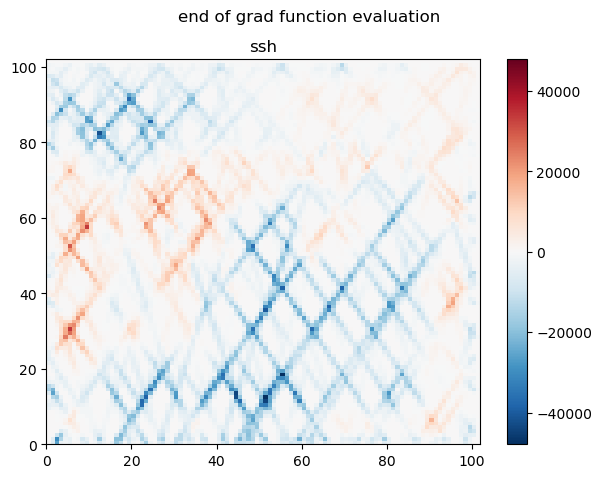

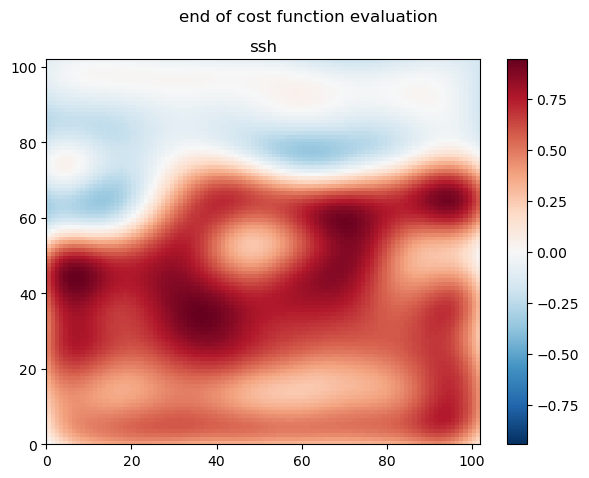

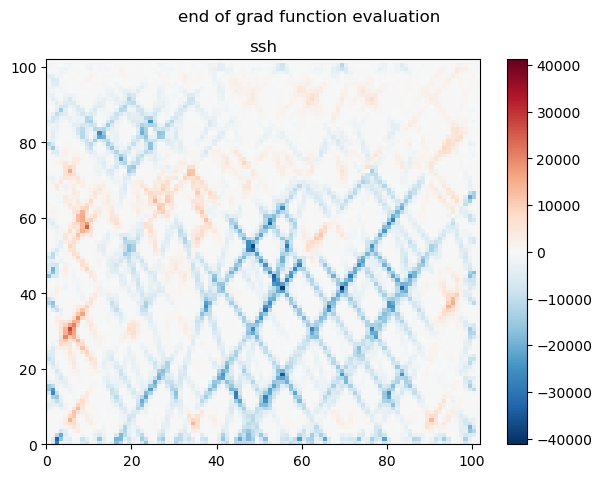


At iterate    8    f=  7.16134D+06    |proj g|=  1.21187D+05


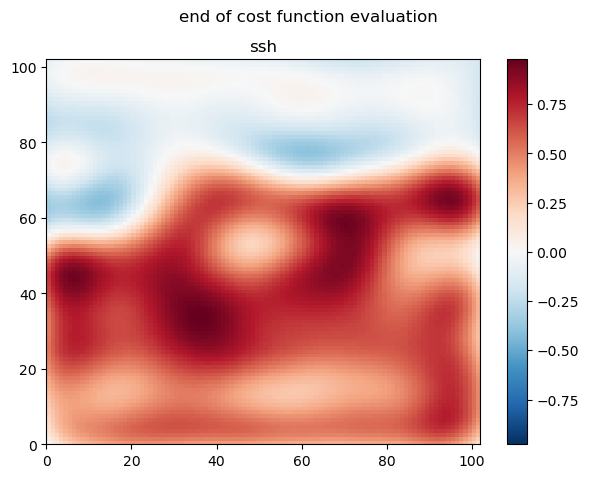

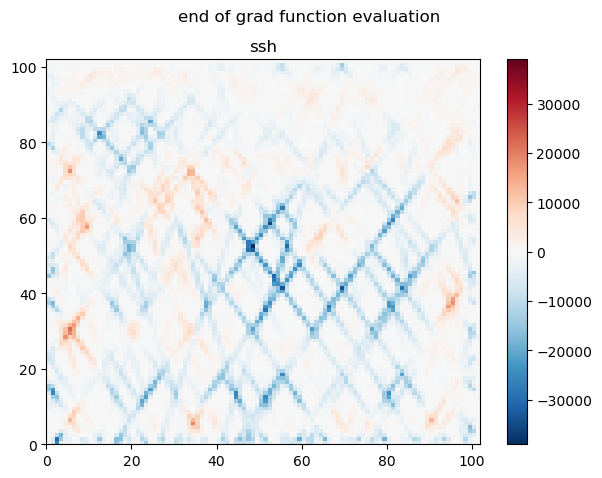


At iterate    9    f=  6.68284D+06    |proj g|=  5.75039D+04


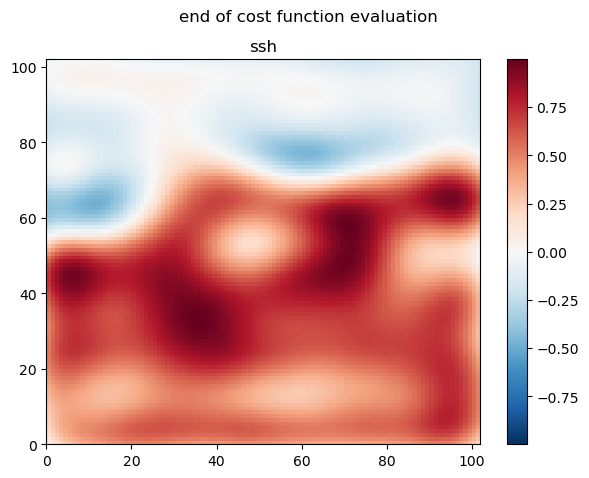

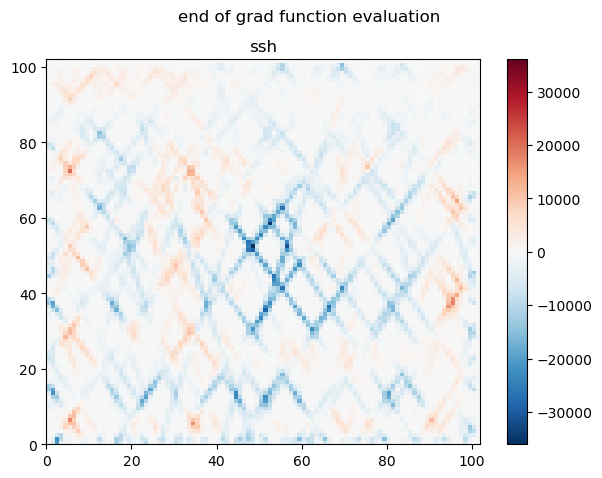


At iterate   10    f=  6.13229D+06    |proj g|=  5.49152D+04


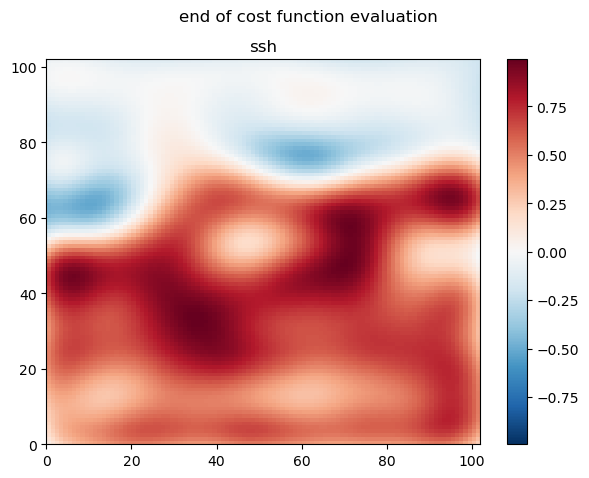

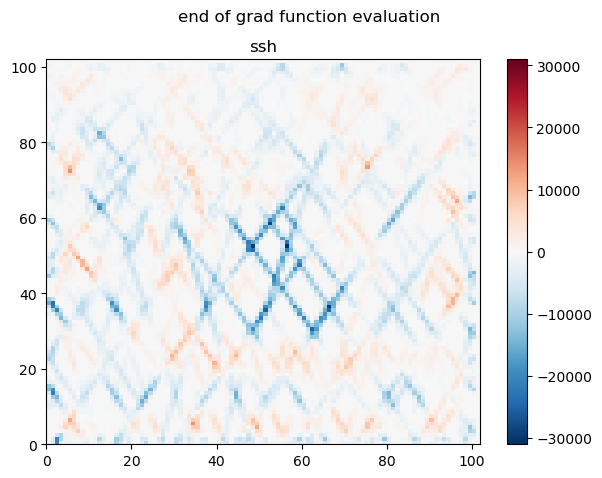


At iterate   11    f=  5.72619D+06    |proj g|=  6.59458D+04


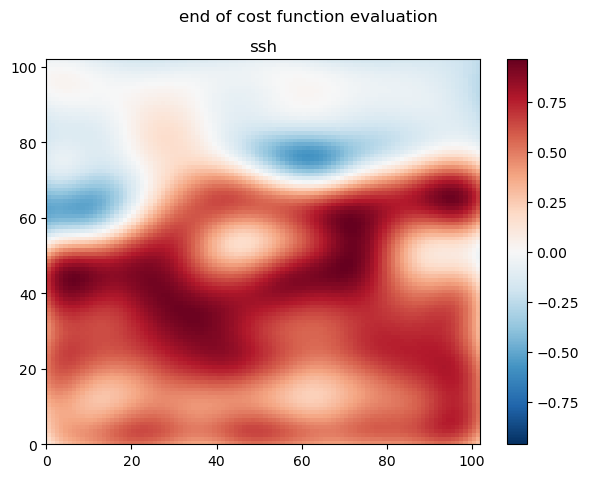

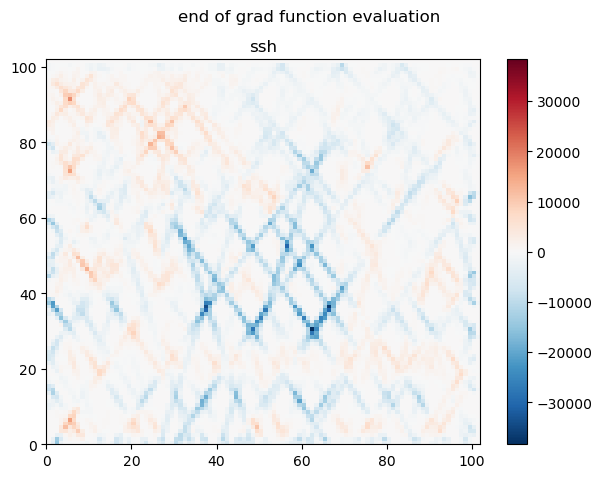


At iterate   12    f=  5.34447D+06    |proj g|=  4.65650D+04


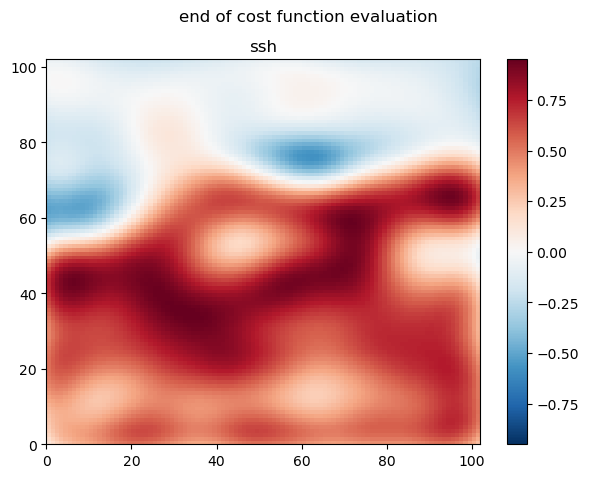

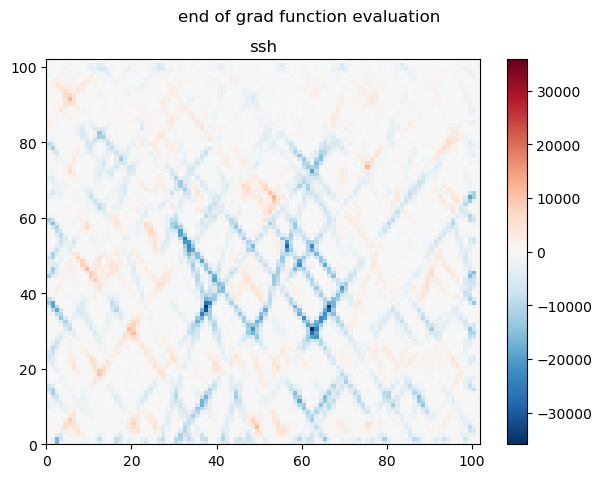


At iterate   13    f=  5.08132D+06    |proj g|=  3.18094D+04


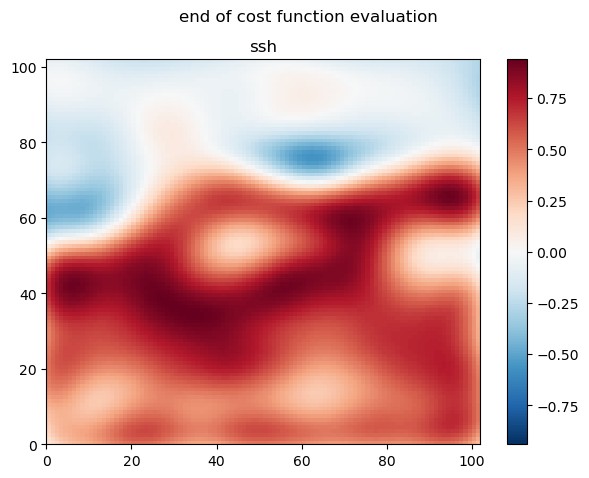

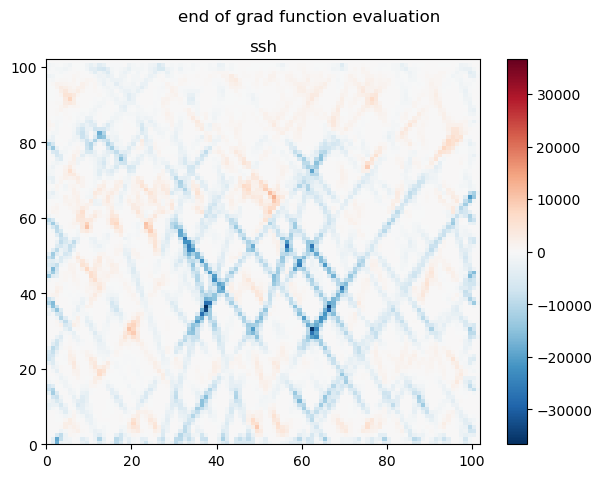


At iterate   14    f=  4.88851D+06    |proj g|=  3.49905D+04


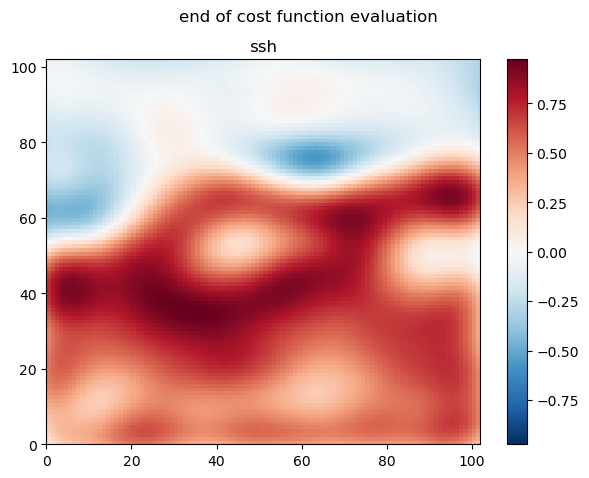

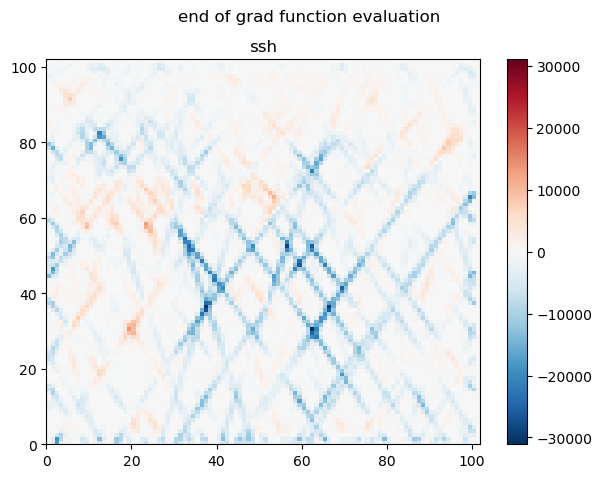


At iterate   15    f=  4.68865D+06    |proj g|=  3.10952D+04


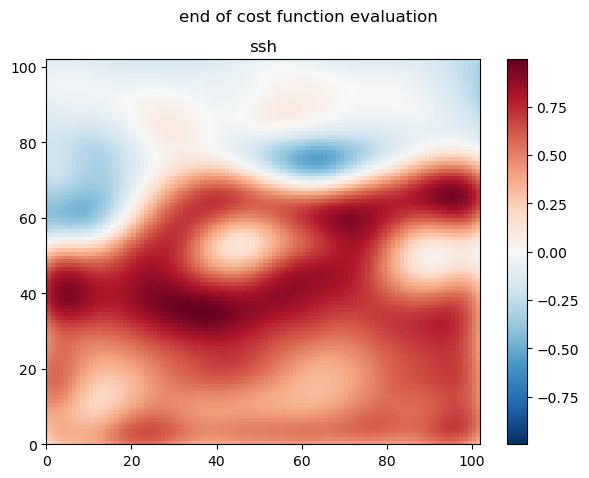

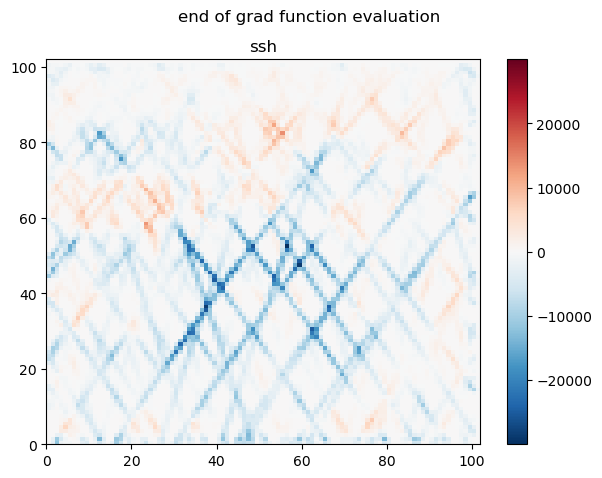


At iterate   16    f=  4.41756D+06    |proj g|=  6.51350D+04


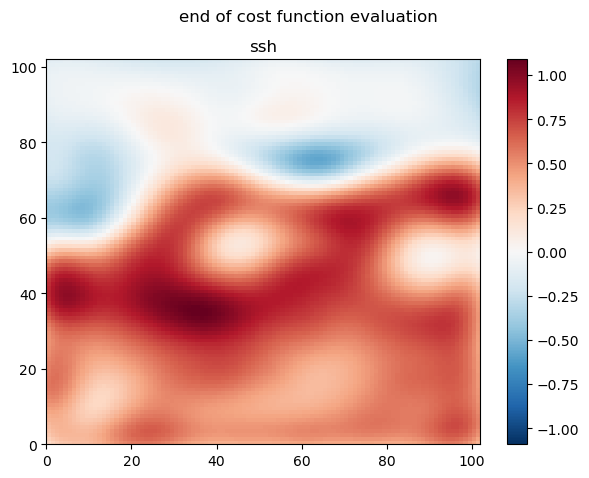

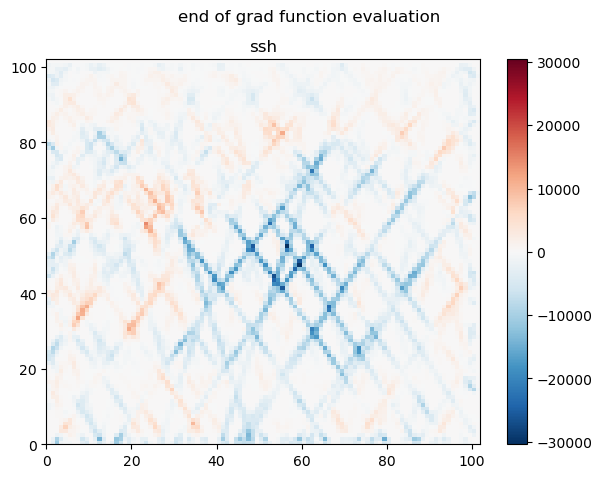


At iterate   17    f=  4.21696D+06    |proj g|=  3.88495D+04


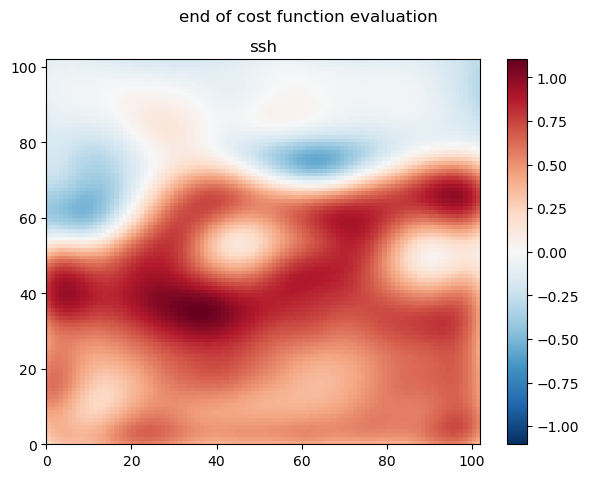

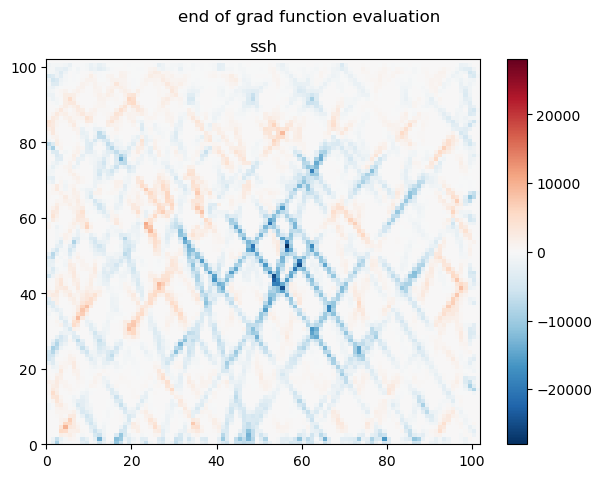


At iterate   18    f=  4.09659D+06    |proj g|=  1.68748D+04


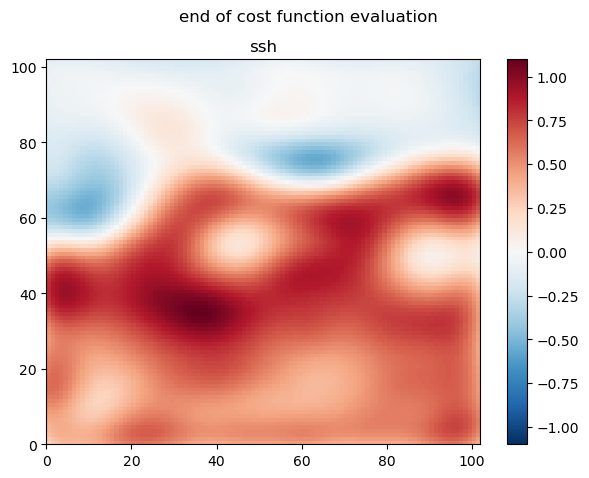

KeyboardInterrupt: 

In [10]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

## Diagnostics

In [ ]:
from src import diag as diag
Diag = diag.Diag(config,State)

In [ ]:
Diag.regrid_exp()

In [ ]:
Diag.rmse_based_scores(plot=True)

In [ ]:
Diag.psd_based_scores(plot=True)

In [ ]:
Diag.movie(framerate=12)

In [ ]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [ ]:
Leaderboard = Diag.Leaderboard()
Leaderboard